In [1]:
import numpy as np
from scipy.interpolate import Rbf
import matplotlib.pyplot as plt

In [2]:
def input_known_points():
    known_points = []
    print("Enter the known points (x, y, Concentration). Enter 'done' to finish input.")
    while True:
        point_input = input("Enter point (x, y, Concentration): ")
        if point_input == "done":
            break
        try:
            x, y, Concentration = map(float, point_input.split())
            known_points.append((x, y, Concentration))
        except ValueError:
            print("Invalid input. Please try again.")
    return known_points

In [3]:
def input_grid_cell_size():
    while True:
        cell_size = input("Enter the grid cell size: ")
        try:
            cell_size = float(cell_size)
            if cell_size <= 0:
                print("Invalid input. Cell size must be a positive number.")
            else:
                return cell_size
        except ValueError:
            print("Invalid input. Please enter a number.")

In [4]:
known_points = input_known_points()

if len(known_points) < 5:
    print("At least 5 known points are required for interpolation.")
else:
    x = np.array([point[0] for point in known_points])
    y = np.array([point[1] for point in known_points])
    Concentration = np.array([point[2] for point in known_points])
    cell_size = input_grid_cell_size()
    grid_x, grid_y = np.meshgrid(
        np.arange(x.min(), x.max() + cell_size, cell_size),
        np.arange(y.min(), y.max() + cell_size, cell_size)
    )

Enter the known points (x, y, Concentration). Enter 'done' to finish input.


Enter point (x, y, Concentration):  10 10 10
Enter point (x, y, Concentration):  20 20 20
Enter point (x, y, Concentration):  30 30 30
Enter point (x, y, Concentration):  40 40 40
Enter point (x, y, Concentration):  50 50 50
Enter point (x, y, Concentration):  60 60 40
Enter point (x, y, Concentration):  70 70 30
Enter point (x, y, Concentration):  80 80 20
Enter point (x, y, Concentration):  90 90 10
Enter point (x, y, Concentration):  done
Enter the grid cell size:  10


In [5]:
grid_points = np.column_stack((grid_x.flatten(), grid_y.flatten()))
rbf = Rbf(x, y, Concentration, function='linear')
interp_values = rbf(grid_points[:, 0], grid_points[:, 1])
interp_values = interp_values.reshape(grid_x.shape)

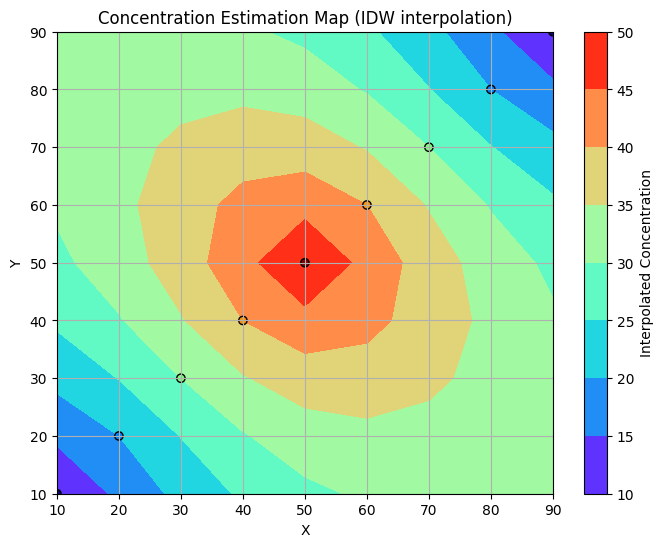

In [6]:
plt.figure(figsize=(8, 6))
plt.contourf(grid_x, grid_y, interp_values, cmap='rainbow')
plt.colorbar(label='Interpolated Concentration')
plt.scatter(x, y, c=Concentration, cmap='jet', edgecolors='k')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Concentration Estimation Map (IDW interpolation)')
plt.grid(True)
plt.show()